<a href="https://colab.research.google.com/github/sangeetaisaac/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression





In [10]:
import os
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
os.chdir('/content/gdrive/MyDrive/Interview Kickstart')

Mounted at /content/gdrive


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
tv_dataset= pd.read_csv('tvmarketing.csv')
tv_dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [15]:
tv_dataset.shape

(200, 2)

###Visualizing the data using a scatter plot

[]

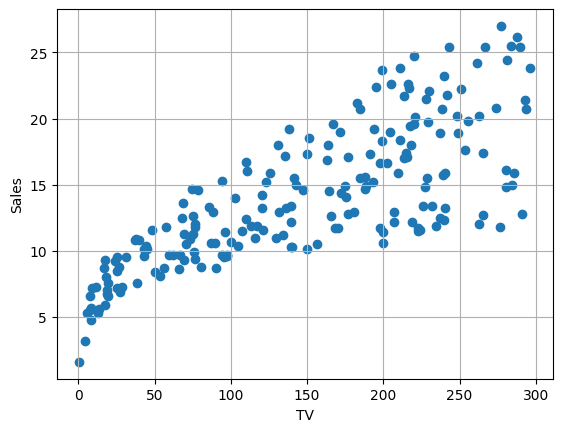

In [20]:
plt.scatter(tv_dataset['TV'], tv_dataset['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.plot()

###Splitting the data into Training and Testing

In [23]:
X = np.array(tv_dataset['TV'])
Y = np.array(tv_dataset['Sales'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

###Training the data using Linear Regression model


In [24]:
model = LinearRegression()
model.fit(X_train.reshape(-1,1), Y_train)

LinearRegression()

In [25]:
X_train

array([109.8, 229.5, 253.8, 184.9,  44.7,  62.3, 292.9, 172.5, 202.5,
         7.3, 265.2, 197.6, 218.5, 147.3, 171.3, 217.7, 262.7, 163.5,
       100.4,  76.3, 184.9, 134.3, 273.7, 296.4,  96.2, 109.8, 255.4,
       204.1, 240.1, 193.7, 191.1,  89.7,  43. ,  38.2,  13.1, 239.3,
        17.2, 210.7,  25.6, 177. , 206.9,  66.1, 149.7, 129.4,  94.2,
       276.7, 276.9,   7.8, 250.9, 175.7,  11.7,  75.5, 199.8, 230.1,
       107.4, 225.8, 163.3, 131.1, 206.8, 177. , 216.8,  66.9, 227.2,
       193.2,  97.5,  85.7, 228.3, 139.5,  48.3, 218.4, 195.4,   5.4,
       238.2, 216.4, 222.4,  27.5, 151.5, 139.2, 117.2, 283.6,  57.5,
       237.4, 213.5,  18.8,   4.1, 164.5,  93.9,  28.6, 232.1, 214.7,
        19.4, 280.2, 290.7, 136.2,  69. ,  44.5, 141.3, 188.4, 293.6,
       137.9,   8.4, 168.4, 281.4,  43.1, 219.8, 182.6, 149.8, 220.3,
        95.7, 248.8,  78.2, 121. , 112.9,  17.9,  80.2, 248.4,  97.2,
       220.5, 284.3, 243.2,  70.6, 135.2,  75.3, 116. ,  75.1,  38. ,
       166.8,  26.8,

###Print the Intercept and Slope
#####ypred = a + b * x



In [30]:
print(f'a =', model.intercept_)
print(f'b =', model.coef_)

a = 7.248909283005854
b = [0.04614341]


###Make Predictions using the model on the test set

In [31]:
Y_pred = model.predict(X_test.reshape(-1,1))
Y_pred.shape

(50,)

###Visualizing the predictions using a Scatter plot

[]

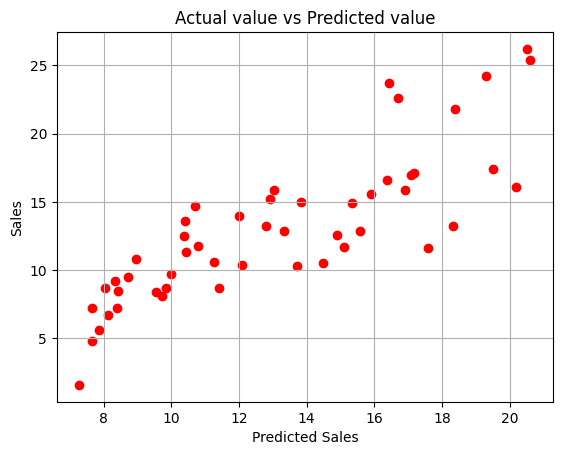

In [33]:
plt.scatter(Y_pred, Y_test, color = 'red')
plt.title('Actual value vs Predicted value')
plt.xlabel('Predicted Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.plot()

###Mean squared error computation

In [34]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

8.730248872947453


###r2 value computation

In [35]:
r2 = r2_score(Y_test, Y_pred)
print(r2)

0.6902574858002379


###Visualize the error terms

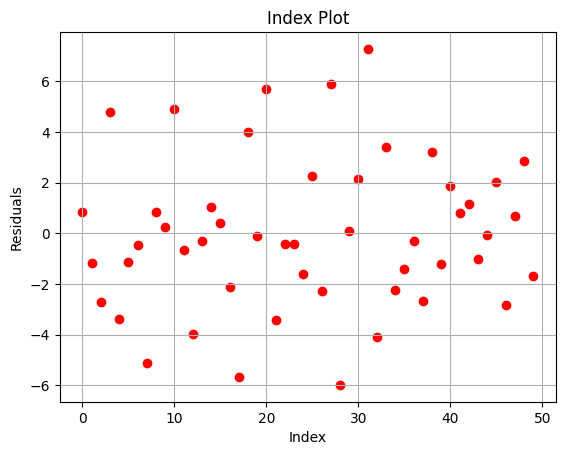

In [37]:
plt.scatter([x for x in range(Y_test.shape[0])], Y_test - Y_pred, color='red', linewidth= 1, linestyle = "-")
plt.title('Index Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)